<a href="https://colab.research.google.com/github/Mahmoudi1993/SICAP/blob/main/Data_augmentation_using_with_SICAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [ ]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-sn_cbo51
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-sn_cbo51
  Resolved https://github.com/facebookresearch/fvcore.git to commit d817f01ca43612daa3923332beafb5a113148489
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-2yc4bmls
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-2yc4bmls
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65299 sha256=3d1d58c27990ebc26bc07681ab867e3f0db5b6cedaa72a8844334c7c9d6fa6b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ddl285s3/wheels/8f/cb/6a/3b7ac0e01781855ca3d1417ebf9e15e20d5b7fe37ab063aa50


'2.0.1+cu118'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install file:////content/detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Processing //content/detectron2_repo
  Preparing metadata (setup.py) ... done
  Using cached pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl
  Using cached fvcore-0.1.5.post20221221-py3-none-any.whl
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=7803581 sha256=67788cdeec73f9e2ba483ffa5c17f980b15527107efb5f60e375b963f4bd2edb
  Stored in directory: /tmp/pip-ephem-wheel-cache-awnil1pj/wheels/8b/ec/a5/3b10bdf8959eef9543ab09f7d1430331dea05939309991ca77
Successfully built detectron2
  Attempting uninstall: fvcore
    Found existing installation: fvcore 0.1.6
    Uninstalling fvcore-0.1.6:
      Successfully uninstalled fvcore-0.1.6
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
  Attempting uninstall: detectron2
    Found existing installation: de

# Clone the file from Gihub

In [ ]:
!git clone https://github.com/Mahmoudi1993/SICAP.git

# Start Data augmentation

In [ ]:
%cd SICAP/

# Implementing Smart Image Cropping and Patching

**smart crop:**

There are many variations of random crop that we can perform. Those implementations also depend on type of computer vision problem we’re solving.

Consider: What object are we looking to cut out of the image? Do we want the same product every time? If we are cropping images that contain several different objects, which of the existing objects must be present in the resulting image for the image to still be valid?

In the most basic case, a classification problem where we don’t need to worry about multiple objects detection problem, we’re creating a smart subset of an image. We’d set the desired output area of our crop, determine smart output coordinates, and perform the crop.

**Patching:**

Smart crops four images and patches them to create a new training image.


**Detect Object:**

Setting the Detectron2

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
from os.path import join, isfile, isdir
from os import listdir
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from argparse import ArgumentParser

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
cfg.merge_from_file("/content/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)

[07/09 19:58:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 158MB/s]                           


In [ ]:
%cd  /content/example

/content/gdrive/MyDrive/example


 Data augmentation Smart Cropping and Patching

In [ ]:
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
from re import T
from detectron2.data.transforms import CropTransform
import random
from random import Random
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

from detectron2.data import transforms as T
from detectron2.data.transforms.augmentation import *
import cv2

import matplotlib.pyplot as plt
import glob
import os


# Define a sequence of augmentations:
augs = T.AugmentationList([
                      T.Resize((800,600)),
                      T.RandomBrightness(0.8, 1.8),
                      T.RandomContrast(0.6, 1.3),
                      T.RandomSaturation(0.8, 1.4),
                      T.RandomRotation(angle=[90, 90]),
                      T.RandomLighting(0.7),
                      T.RandomFlip(prob=0.4, horizontal=False, vertical=True),
])


input_dir = "/content/example/"
image_list = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
show_index = 1


for image_path in image_list:
    im = cv2.imread(join(input_dir, image_path))
    outputs = predictor(im)

    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    #cv2_imshow(v.get_image()[:, :, ::-1])

    #save ---> the predictions on the image
    save_img_path = '/content/predictions/'
    if os.path.isdir(save_img_path) is False:
        print('Create path: {0}'.format(save_img_path))
        os.makedirs(save_img_path)

    cv2.imwrite('/content/predictions/'+image_path.split('.')[0] +"_pre"+'.JPEG',  v.get_image()[:, :, ::-1])

    import uuid
    boxes = {}
    Coordinates_array = []
    Crop_img_list = []
    for coordinates in outputs["instances"].to("cpu").pred_boxes:
      coordinates_array = []

      for k in coordinates:
        coordinates_array.append(int(k))
      Coordinates_array.append(coordinates_array)

      U = coordinates_array[0]
      D = coordinates_array[1]
      W = coordinates_array[2]
      H = coordinates_array[3]

      CT = CropTransform(U, D, W, H)
      crop_img = CT.apply_image(im)
      Crop_img_list.append(crop_img)

    Crop_img_len = len(Crop_img_list)


    output_images = []
    if Crop_img_len > 4:
      SEED = 4
      Random(SEED).shuffle(Crop_img_list)
      output_images = Crop_img_list[:4]

    if Crop_img_len < 4:
      Number_Augmention = 4 - Crop_img_len
      Augmention_list = []
      for i in range(Number_Augmention):
        input = T.AugInput(im)
        transform = augs(input)
        image_transformed = input.image
        Augmention_list.append(image_transformed)
        #cv2_imshow(image_transformed)

      Crop_img_list.extend(Augmention_list)
      Crop_img_len2 = len(Crop_img_list)
      output_images = Crop_img_list

    if Crop_img_len == 4:
      output_images = Crop_img_list

    image_B = []
    for i in range(4):
      Output_images = cv2.resize(output_images[i], (32,32))
      image_B.append(Output_images)

    img0 = image_B[0]
    img1 = image_B[1]
    img2 = image_B[2]
    img3 = image_B[3]

    # define a function for vertically
    # concatenating images of the
    # same size  and horizontally
    def concat_vh(list_2d):

        # return final image
        return cv2.vconcat([cv2.hconcat(list_h)
                            for list_h in list_2d])
    # image resizing
    img1_s = cv2.resize(img1, dsize = (0,0),
                        fx = 0.5, fy = 0.5)

    # function calling
    img_tile = concat_vh([[img0, img1],
                          [img2, img3]
                          ])
    # show the output image
    #cv2_imshow(img_tile)

    #save ---> the output image
    save_img_path = '/content/results/'
    if os.path.isdir(save_img_path) is False:
        print('Create path: {0}'.format(save_img_path))
        os.makedirs(save_img_path)

    cv2.imwrite('/content/results/'+image_path.split('.')[0] +"_ref"+'.JPEG',  img_tile)



show the Data augmentation results

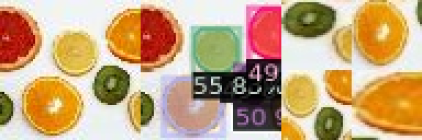

True

In [6]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

img_name_list_test = ['0_test', '1_test', '2_test', '3_test', '4_test']
img_name_list_pre = ['0_test_pre', '1_test_pre', '2_test_pre', '3_test_pre', '4_test_pre']
img_name_list_ref = ['0_test_ref', '1_test_ref', '2_test_ref', '3_test_ref', '4_test_ref']
show_index = 3

img_test = cv2.imread('/content/example/'+img_name_list_test[show_index]+'.JPEG')
img_pre = cv2.imread('/content/predictions/'+img_name_list_pre[show_index]+'.JPEG')
img_ref = cv2.imread('/content/results/'+img_name_list_ref[show_index]+'.JPEG')

def vconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    w_min = min(im.shape[1] for im in im_list)
    im_list_resize = [cv2.resize(im, (w_min, int(im.shape[0] * w_min / im.shape[1])), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

im_v_resize = vconcat_resize_min([img_test, img_pre, img_ref])

# resize image
scale_percent = 220 # percent of original size
width = int(im_v_resize.shape[1] * scale_percent / 100)
height = int(im_v_resize.shape[0] * scale_percent / 100)
dim = (width, height)
output = cv2.resize(im_v_resize, dim, interpolation = cv2.INTER_AREA)

cv2_imshow(output)
cv2.imwrite('/content/gdrive/MyDrive/opencv_vconcat_resize.JPEG', output)